***Import libraires and data, set up stuff***

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import rpy2.rinterface_lib.callbacks
#import logging

#from rpy2.robjects import pandas2ri
#import anndata2ri

In [4]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
#rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
#pandas2ri.activate()
#anndata2ri.activate()
#%load_ext rpy2.ipython

In [2]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
mypath1 = '../../results_5e5/out_1dsfs/'
fileLists = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]
mypath2 = '../../results_5e6/out_1dsfs/'

Generate SFS1d plots including 0 counts and without 0 counts

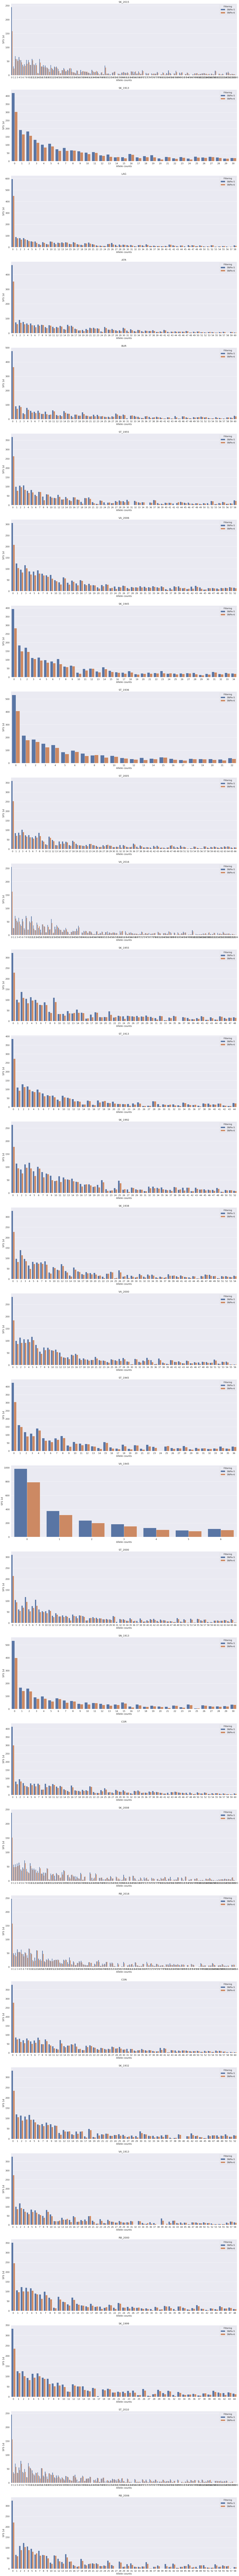

In [128]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=(30,350) #rescale figures
f, ax = plt.subplots(len(fileLists))
counter = 0
for fileName in fileLists:
    f = open(mypath1+'/'+fileName, "r")
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ') ]
    f = open(mypath2+'/'+fileName, "r")
    y = f.read()
    y2 = [ np.float32(i) for i in y.rstrip(' \n').split(' ') ]
    L1 = len(x2); L2 = len(y2)
    z2 = x2 + y2
    hue = ['SNPe-5' for i in range(L1)] + ['SNPe-6' for i in range(L2)]
    df=pd.DataFrame()
    df['Filtering'] = hue
    df['SFS 1d'] = z2
    df['Allele counts'] = np.int8(np.concatenate( (np.linspace(0,L1-1,num=L1) , 
                                    np.linspace(0,L1-1,num=L1)) ))
    sns.barplot(x='Allele counts',y='SFS 1d', hue='Filtering', data=df, ax = ax[counter])
    ax[counter].set_title(fileName.split('.')[0])
    counter+=1

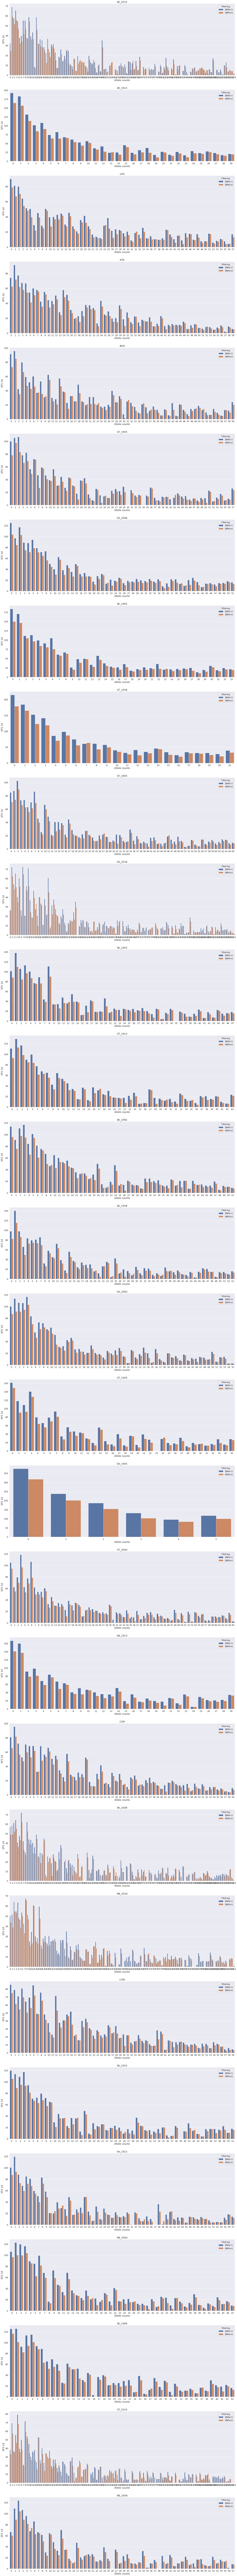

In [129]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=(30,350) #rescale figures
f, ax = plt.subplots(len(fileLists))
counter = 0
for fileName in fileLists:
    f = open(mypath1+'/'+fileName, "r")
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[1::] ]
    f = open(mypath2+'/'+fileName, "r")
    y = f.read()
    y2 = [ np.float32(i) for i in y.rstrip(' \n').split(' ')[1::] ]
    L1 = len(x2); L2 = len(y2)
    z2 = x2 + y2
    hue = ['SNPe-5' for i in range(L1)] + ['SNPe-6' for i in range(L2)]
    df=pd.DataFrame()
    df['Filtering'] = hue
    df['SFS 1d'] = z2
    df['Allele counts'] = np.int8(np.concatenate( (np.linspace(0,L1-1,num=L1) , 
                                    np.linspace(0,L1-1,num=L1)) ))
    sns.barplot(x='Allele counts',y='SFS 1d', hue='Filtering', data=df, ax = ax[counter])
    ax[counter].set_title(fileName.split('.')[0])
    counter+=1

## Plot 2D sfs and save them as matrices

In [16]:
!mkdir -p ../../results_5e5/out_2dsfs_heatmaps/
!mkdir -p ../../results_5e6/out_2dsfs_heatmaps/

plotting loop

In [17]:
import matplotlib.pyplot as pyplot
sns.set(font_scale=.8)
plt.rcParams['figure.figsize']=(8,8) #rescale figures
counter = 0
mypath1 = '../../results_5e5/out_2dsfs/'
fileLists = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]
mypath2 = '../../results_5e6/out_2dsfs/'
for fileName in fileLists:
    # Read the first heatmap as a vector
    
    f = open(mypath1+'/'+fileName, "r")
    print(fileName)
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
    # open 1d sfs to read length of rows and columns
    f2 = open( '../../results_5e5/out_1dsfs/'+fileName.split('.')[0]+'.sfs' )
    f3 = open( '../../results_5e5/out_1dsfs/'+fileName.split('.')[1]+'.sfs' )
    y = f2.read()
    y2 = [ i for i in y.rstrip(' \n').split(' ') ]
    z = f3.read()
    z2 = [ i for i in z.rstrip(' \n').split(' ') ]
    SFS2D_5e5 = np.reshape( np.array(x2), (len(y2),len(z2)) )
    SFS2D_5e5 = pd.DataFrame(SFS2D_5e5,
                    columns=[fileName.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName.split('.')[0]+'_'+str(j) for j in range(len(y2))])
    f.close()
    f2.close()
    f3.close()
    # Read the first heatmap as a vector
    f = open(mypath2+'/'+fileName, "r")
    print(fileName)
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
    # open 1d sfs to read length of rows and columns
    f2 = open( '../../results_5e6/out_1dsfs/'+fileName.split('.')[0]+'.sfs' )
    f3 = open( '../../results_5e6/out_1dsfs/'+fileName.split('.')[1]+'.sfs' )
    y = f2.read()
    y2 = [ i for i in y.rstrip(' \n').split(' ') ]
    z = f3.read()
    z2 = [ i for i in z.rstrip(' \n').split(' ') ]
    SFS2D_5e6 = np.reshape( np.array(x2), (len(y2),len(z2)) )
    SFS2D_5e6 = pd.DataFrame(SFS2D_5e6,
                    columns=[fileName.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName.split('.')[0]+'_'+str(j) for j in range(len(y2))])    
    f.close()
    f2.close()
    f3.close()
    #plot heatmaps
    figSNS = sns.heatmap( np.log1p(SFS2D_5e5))
    fig = figSNS.get_figure()
    fig.savefig("../../results_5e5/out_2dsfs_heatmaps/"+fileName+'.matrix.png')
    figSNS2 = sns.heatmap( np.log1p(SFS2D_5e6))
    fig2 = figSNS2.get_figure()
    fig2.savefig("../../results_5e6/out_2dsfs_heatmaps/"+fileName+'.matrix.png')  
    #increase plotting line
    counter += 1
    print(counter)
    
    pyplot.close( fig )
    pyplot.close( fig2 )

SK_1938.CON.2dsfs.sfs
SK_1938.CON.2dsfs.sfs
1
SK_1999.ST_1945.2dsfs.sfs
SK_1999.ST_1945.2dsfs.sfs
2
RB_2000.RB_2016.2dsfs.sfs
RB_2000.RB_2016.2dsfs.sfs
3
VA_1945.SK_1955.2dsfs.sfs
VA_1945.SK_1955.2dsfs.sfs
4
CON.ST_1913.2dsfs.sfs
CON.ST_1913.2dsfs.sfs
5
LAG.RB_2000.2dsfs.sfs
LAG.RB_2000.2dsfs.sfs
6
COR.RB_2006.2dsfs.sfs
COR.RB_2006.2dsfs.sfs
7
SK_1932.ST_2000.2dsfs.sfs
SK_1932.ST_2000.2dsfs.sfs
8
LAG.ST_1936.2dsfs.sfs
LAG.ST_1936.2dsfs.sfs
9
RB_2000.VA_2016.2dsfs.sfs
RB_2000.VA_2016.2dsfs.sfs
10
VA_2016.SK_2008.2dsfs.sfs
VA_2016.SK_2008.2dsfs.sfs
11
ST_2005.VA_1913.2dsfs.sfs
ST_2005.VA_1913.2dsfs.sfs
12
VA_2000.SK_1913.2dsfs.sfs
VA_2000.SK_1913.2dsfs.sfs
13
LAG.VA_2000.2dsfs.sfs
LAG.VA_2000.2dsfs.sfs
14
SK_2015.ST_1936.2dsfs.sfs
SK_2015.ST_1936.2dsfs.sfs
15
COR.VA_2006.2dsfs.sfs
COR.VA_2006.2dsfs.sfs
16
VA_1945.ST_1945.2dsfs.sfs
VA_1945.ST_1945.2dsfs.sfs
17
ST_1955.RB_2006.2dsfs.sfs
ST_1955.RB_2006.2dsfs.sfs
18
ST_2005.CON.2dsfs.sfs
ST_2005.CON.2dsfs.sfs
19
COR.SK_1992.2dsfs.sfs
COR.SK

157
RB_2016.SK_2008.2dsfs.sfs
RB_2016.SK_2008.2dsfs.sfs
158
VA_2000.VA_2016.2dsfs.sfs
VA_2000.VA_2016.2dsfs.sfs
159
SK_1945.CON.2dsfs.sfs
SK_1945.CON.2dsfs.sfs
160
LAG.SK_2008.2dsfs.sfs
LAG.SK_2008.2dsfs.sfs
161
CON.SK_1992.2dsfs.sfs
CON.SK_1992.2dsfs.sfs
162
ST_2005.SK_1945.2dsfs.sfs
ST_2005.SK_1945.2dsfs.sfs
163
COR.ATR.2dsfs.sfs
COR.ATR.2dsfs.sfs
164
SK_1955.ST_2010.2dsfs.sfs
SK_1955.ST_2010.2dsfs.sfs
165
SK_1999.ATR.2dsfs.sfs
SK_1999.ATR.2dsfs.sfs
166
COR.SK_1999.2dsfs.sfs
COR.SK_1999.2dsfs.sfs
167
SK_2015.SK_2008.2dsfs.sfs
SK_2015.SK_2008.2dsfs.sfs
168
ST_2010.ST_1955.2dsfs.sfs
ST_2010.ST_1955.2dsfs.sfs
169
VA_2000.SK_2015.2dsfs.sfs
VA_2000.SK_2015.2dsfs.sfs
170
VA_2016.ST_1936.2dsfs.sfs
VA_2016.ST_1936.2dsfs.sfs
171
ST_2005.ST_1955.2dsfs.sfs
ST_2005.ST_1955.2dsfs.sfs
172
SK_1945.ST_2000.2dsfs.sfs
SK_1945.ST_2000.2dsfs.sfs
173
VA_2016.ATR.2dsfs.sfs
VA_2016.ATR.2dsfs.sfs
174
SK_1955.ST_1945.2dsfs.sfs
SK_1955.ST_1945.2dsfs.sfs
175
SK_2008.BUR.2dsfs.sfs
SK_2008.BUR.2dsfs.sfs
176
SK_2

310
ST_1913.ATR.2dsfs.sfs
ST_1913.ATR.2dsfs.sfs
311
VA_2006.ST_1936.2dsfs.sfs
VA_2006.ST_1936.2dsfs.sfs
312
SK_1913.BUR.2dsfs.sfs
SK_1913.BUR.2dsfs.sfs
313
VA_2000.SK_1992.2dsfs.sfs
VA_2000.SK_1992.2dsfs.sfs
314
SN_1913.VA_1913.2dsfs.sfs
SN_1913.VA_1913.2dsfs.sfs
315
VA_1913.ST_1955.2dsfs.sfs
VA_1913.ST_1955.2dsfs.sfs
316
SK_1955.CON.2dsfs.sfs
SK_1955.CON.2dsfs.sfs
317
SK_1938.RB_2000.2dsfs.sfs
SK_1938.RB_2000.2dsfs.sfs
318
COR.SK_1913.2dsfs.sfs
COR.SK_1913.2dsfs.sfs
319
VA_2000.VA_2006.2dsfs.sfs
VA_2000.VA_2006.2dsfs.sfs
320
ST_1913.SK_1992.2dsfs.sfs
ST_1913.SK_1992.2dsfs.sfs
321
SK_1938.ST_1936.2dsfs.sfs
SK_1938.ST_1936.2dsfs.sfs
322
RB_2000.ST_1913.2dsfs.sfs
RB_2000.ST_1913.2dsfs.sfs
323
VA_1913.SK_1945.2dsfs.sfs
VA_1913.SK_1945.2dsfs.sfs
324
VA_2000.RB_2006.2dsfs.sfs
VA_2000.RB_2006.2dsfs.sfs
325
VA_1913.CON.2dsfs.sfs
VA_1913.CON.2dsfs.sfs
326
VA_1945.SK_1938.2dsfs.sfs
VA_1945.SK_1938.2dsfs.sfs
327
CON.RB_2016.2dsfs.sfs
CON.RB_2016.2dsfs.sfs
328
ST_2005.SK_2008.2dsfs.sfs
ST_2005.SK

loop to export matrices

In [19]:
!mkdir -p ../../results_5e5/out_2dsfs_matrices/
!mkdir -p ../../results_5e6/out_2dsfs_matrices/

In [20]:
import matplotlib.pyplot as pyplot
sns.set(font_scale=.8)
plt.rcParams['figure.figsize']=(8,8) #rescale figures
counter = 0
mypath1 = '../../results_5e5/out_2dsfs/'
fileLists = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]
mypath2 = '../../results_5e6/out_2dsfs/'
for fileName in fileLists:
    # Read the first heatmap as a vector
    
    f = open(mypath1+'/'+fileName, "r")
    print(fileName)
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
    # open 1d sfs to read length of rows and columns
    f2 = open( '../../results_5e5/out_1dsfs/'+fileName.split('.')[0]+'.sfs' )
    f3 = open( '../../results_5e5/out_1dsfs/'+fileName.split('.')[1]+'.sfs' )
    y = f2.read()
    y2 = [ i for i in y.rstrip(' \n').split(' ') ]
    z = f3.read()
    z2 = [ i for i in z.rstrip(' \n').split(' ') ]
    SFS2D_5e5 = np.reshape( np.array(x2), (len(y2),len(z2)) )
    SFS2D_5e5 = pd.DataFrame(SFS2D_5e5,
                    columns=[fileName.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName.split('.')[0]+'_'+str(j) for j in range(len(y2))])
    SFS2D_5e5.to_csv("../../results_5e5/out_2dsfs_matrices/"+fileName+'.txt', sep='\t')
    f.close()
    f2.close()
    f3.close()
    # Read the first heatmap as a vector
    f = open(mypath2+'/'+fileName, "r")
    print(fileName)
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
    # open 1d sfs to read length of rows and columns
    f2 = open( '../../results_5e6/out_1dsfs/'+fileName.split('.')[0]+'.sfs' )
    f3 = open( '../../results_5e6/out_1dsfs/'+fileName.split('.')[1]+'.sfs' )
    y = f2.read()
    y2 = [ i for i in y.rstrip(' \n').split(' ') ]
    z = f3.read()
    z2 = [ i for i in z.rstrip(' \n').split(' ') ]
    SFS2D_5e6 = np.reshape( np.array(x2), (len(y2),len(z2)) )
    SFS2D_5e6 = pd.DataFrame(SFS2D_5e6,
                    columns=[fileName.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName.split('.')[0]+'_'+str(j) for j in range(len(y2))])    
    SFS2D_5e6.to_csv("../../results_5e6/out_2dsfs_matrices/"+fileName+'.txt', sep='\t')
    f.close()
    f2.close()
    f3.close()
    
    #increase plotting line
    counter += 1
    print(counter)

SK_1938.CON.2dsfs.sfs
SK_1938.CON.2dsfs.sfs
1
SK_1999.ST_1945.2dsfs.sfs
SK_1999.ST_1945.2dsfs.sfs
2
RB_2000.RB_2016.2dsfs.sfs
RB_2000.RB_2016.2dsfs.sfs
3
VA_1945.SK_1955.2dsfs.sfs
VA_1945.SK_1955.2dsfs.sfs
4
CON.ST_1913.2dsfs.sfs
CON.ST_1913.2dsfs.sfs
5
LAG.RB_2000.2dsfs.sfs
LAG.RB_2000.2dsfs.sfs
6
COR.RB_2006.2dsfs.sfs
COR.RB_2006.2dsfs.sfs
7
SK_1932.ST_2000.2dsfs.sfs
SK_1932.ST_2000.2dsfs.sfs
8
LAG.ST_1936.2dsfs.sfs
LAG.ST_1936.2dsfs.sfs
9
RB_2000.VA_2016.2dsfs.sfs
RB_2000.VA_2016.2dsfs.sfs
10
VA_2016.SK_2008.2dsfs.sfs
VA_2016.SK_2008.2dsfs.sfs
11
ST_2005.VA_1913.2dsfs.sfs
ST_2005.VA_1913.2dsfs.sfs
12
VA_2000.SK_1913.2dsfs.sfs
VA_2000.SK_1913.2dsfs.sfs
13
LAG.VA_2000.2dsfs.sfs
LAG.VA_2000.2dsfs.sfs
14
SK_2015.ST_1936.2dsfs.sfs
SK_2015.ST_1936.2dsfs.sfs
15
COR.VA_2006.2dsfs.sfs
COR.VA_2006.2dsfs.sfs
16
VA_1945.ST_1945.2dsfs.sfs
VA_1945.ST_1945.2dsfs.sfs
17
ST_1955.RB_2006.2dsfs.sfs
ST_1955.RB_2006.2dsfs.sfs
18
ST_2005.CON.2dsfs.sfs
ST_2005.CON.2dsfs.sfs
19
COR.SK_1992.2dsfs.sfs
COR.SK

RB_2016.SK_2008.2dsfs.sfs
158
VA_2000.VA_2016.2dsfs.sfs
VA_2000.VA_2016.2dsfs.sfs
159
SK_1945.CON.2dsfs.sfs
SK_1945.CON.2dsfs.sfs
160
LAG.SK_2008.2dsfs.sfs
LAG.SK_2008.2dsfs.sfs
161
CON.SK_1992.2dsfs.sfs
CON.SK_1992.2dsfs.sfs
162
ST_2005.SK_1945.2dsfs.sfs
ST_2005.SK_1945.2dsfs.sfs
163
COR.ATR.2dsfs.sfs
COR.ATR.2dsfs.sfs
164
SK_1955.ST_2010.2dsfs.sfs
SK_1955.ST_2010.2dsfs.sfs
165
SK_1999.ATR.2dsfs.sfs
SK_1999.ATR.2dsfs.sfs
166
COR.SK_1999.2dsfs.sfs
COR.SK_1999.2dsfs.sfs
167
SK_2015.SK_2008.2dsfs.sfs
SK_2015.SK_2008.2dsfs.sfs
168
ST_2010.ST_1955.2dsfs.sfs
ST_2010.ST_1955.2dsfs.sfs
169
VA_2000.SK_2015.2dsfs.sfs
VA_2000.SK_2015.2dsfs.sfs
170
VA_2016.ST_1936.2dsfs.sfs
VA_2016.ST_1936.2dsfs.sfs
171
ST_2005.ST_1955.2dsfs.sfs
ST_2005.ST_1955.2dsfs.sfs
172
SK_1945.ST_2000.2dsfs.sfs
SK_1945.ST_2000.2dsfs.sfs
173
VA_2016.ATR.2dsfs.sfs
VA_2016.ATR.2dsfs.sfs
174
SK_1955.ST_1945.2dsfs.sfs
SK_1955.ST_1945.2dsfs.sfs
175
SK_2008.BUR.2dsfs.sfs
SK_2008.BUR.2dsfs.sfs
176
SK_2015.ST_1913.2dsfs.sfs
SK_2015.

312
SK_1913.BUR.2dsfs.sfs
SK_1913.BUR.2dsfs.sfs
313
VA_2000.SK_1992.2dsfs.sfs
VA_2000.SK_1992.2dsfs.sfs
314
SN_1913.VA_1913.2dsfs.sfs
SN_1913.VA_1913.2dsfs.sfs
315
VA_1913.ST_1955.2dsfs.sfs
VA_1913.ST_1955.2dsfs.sfs
316
SK_1955.CON.2dsfs.sfs
SK_1955.CON.2dsfs.sfs
317
SK_1938.RB_2000.2dsfs.sfs
SK_1938.RB_2000.2dsfs.sfs
318
COR.SK_1913.2dsfs.sfs
COR.SK_1913.2dsfs.sfs
319
VA_2000.VA_2006.2dsfs.sfs
VA_2000.VA_2006.2dsfs.sfs
320
ST_1913.SK_1992.2dsfs.sfs
ST_1913.SK_1992.2dsfs.sfs
321
SK_1938.ST_1936.2dsfs.sfs
SK_1938.ST_1936.2dsfs.sfs
322
RB_2000.ST_1913.2dsfs.sfs
RB_2000.ST_1913.2dsfs.sfs
323
VA_1913.SK_1945.2dsfs.sfs
VA_1913.SK_1945.2dsfs.sfs
324
VA_2000.RB_2006.2dsfs.sfs
VA_2000.RB_2006.2dsfs.sfs
325
VA_1913.CON.2dsfs.sfs
VA_1913.CON.2dsfs.sfs
326
VA_1945.SK_1938.2dsfs.sfs
VA_1945.SK_1938.2dsfs.sfs
327
CON.RB_2016.2dsfs.sfs
CON.RB_2016.2dsfs.sfs
328
ST_2005.SK_2008.2dsfs.sfs
ST_2005.SK_2008.2dsfs.sfs
329
SK_1932.SK_1992.2dsfs.sfs
SK_1932.SK_1992.2dsfs.sfs
330
SN_1913.ATR.2dsfs.sfs
SN_191

In [10]:
%run script_matrix_corr/dcor.py

In [11]:
!mkdir -p ../../results_5e5/out_2dsfs_correlation/
!mkdir -p ../../results_5e6/out_2dsfs_correlation/

In [4]:
import matplotlib.pyplot as pyplot
sns.set(font_scale=.8)
plt.rcParams['figure.figsize']=(8,8) #rescale figures
counter = 0
mypath1 = '../../results_5e5/out_2dsfs/'
fileLists = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]

indices = []
for fileName in fileLists:
    indices.append( fileName.split('.')[0] + '_' + fileName.split('.')[1] )
corr_5e5 = pd.DataFrame(index=indices, columns=indices)
        

for fileName_1 in fileLists:
    for fileName_2 in fileLists:
        # Read the first heatmap
        f = open(mypath1+'/'+fileName_1, "r")
        #print(fileName)
        x = f.read()
        x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
        # open 1d sfs to read length of rows and columns
        f2 = open( '../../results_5e5/out_1dsfs/'+fileName_1.split('.')[0]+'.sfs' )
        f3 = open( '../../results_5e5/out_1dsfs/'+fileName_1.split('.')[1]+'.sfs' )
        y = f2.read()
        y2 = [ i for i in y.rstrip(' \n').split(' ') ]
        z = f3.read()
        z2 = [ i for i in z.rstrip(' \n').split(' ') ]
        #SFS 1D
        SFS2D_1 = np.reshape( np.array(x2), (len(y2),len(z2)) )
        SFS2D_1 = pd.DataFrame(SFS2D_1,
                    columns=[fileName_1.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName_1.split('.')[0]+'_'+str(j) for j in range(len(y2))])
        # Read the second heatmap
        f = open(mypath1+'/'+fileName_2, "r")
        #print(fileName)
        x = f.read()
        x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
        # open 1d sfs to read length of rows and columns
        f2 = open( '../../results_5e5/out_1dsfs/'+fileName_2.split('.')[0]+'.sfs' )
        f3 = open( '../../results_5e5/out_1dsfs/'+fileName_2.split('.')[1]+'.sfs' )
        y = f2.read()
        y2 = [ i for i in y.rstrip(' \n').split(' ') ]
        z = f3.read()
        z2 = [ i for i in z.rstrip(' \n').split(' ') ]
        #SFS 1D
        SFS2D_2 = np.reshape( np.array(x2), (len(y2),len(z2)) )
        SFS2D_2 = pd.DataFrame(SFS2D_2,
                    columns=[fileName_2.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName_2.split('.')[0]+'_'+str(j) for j in range(len(y2))])
    
        #match matrix dimensions
        shape_1 = SFS2D_1.shape
        shape_2 = SFS2D_2.shape
        
        if shape_1[0]>shape_2[0]:
            SFS2D_1 = SFS2D_1.iloc[ range(shape_2[0]), : ]
        else:
            SFS2D_2 = SFS2D_2.iloc[ range(shape_1[0]), : ]
            
        if shape_1[1]>shape_2[1]:
            SFS2D_1 = SFS2D_1.iloc[ :, range(shape_2[1]) ]
        else:
            SFS2D_2 = SFS2D_2.iloc[ :, range(shape_1[1]) ]    
            
        #print(SFS2D_1.shape)
        #print(SFS2D_2.shape)
    
        corr_5e5.loc[ fileName_1.split('.')[0]+'_'+fileName_1.split('.')[1],
            fileName_2.split('.')[0]+'_'+fileName_2.split('.')[1] ] = dcor(SFS2D_1,SFS2D_2)
        
        #increase plotting line
        counter += 1
        #print(counter)
        
        

NameError: name 'dcor' is not defined

In [27]:
corr_5e5.to_csv('../../results_5e5/out_2dsfs_correlation/2DSFS_corr_mat_5e5.csv', sep='\t')

In [5]:
from sklearn import preprocessing

In [6]:
import matplotlib.pyplot as pyplot
sns.set(font_scale=.8)
plt.rcParams['figure.figsize']=(8,8) #rescale figures
counter = 0
mypath1 = '../../results_5e5/out_2dsfs/'
fileLists = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]
mypath2 = '../../results_5e6/out_2dsfs/'
SFS_vec_5e5 = dict()
count = 0
for fileName in fileLists:
    # Read the first heatmap as a vector
    
    f = open(mypath1+'/'+fileName, "r")
    print(fileName)
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
    # open 1d sfs to read length of rows and columns
    f2 = open( '../../results_5e5/out_1dsfs/'+fileName.split('.')[0]+'.sfs' )
    f3 = open( '../../results_5e5/out_1dsfs/'+fileName.split('.')[1]+'.sfs' )
    y = f2.read()
    y2 = [ i for i in y.rstrip(' \n').split(' ') ]
    z = f3.read()
    z2 = [ i for i in z.rstrip(' \n').split(' ') ]
    SFS_vec_5e5[count] = np.array(x2)#np.array(preprocessing.scale(x2))
    count+=1
    SFS2D_5e5 = np.reshape( np.array(x2), (len(y2),len(z2)) )
    SFS2D_5e5 = pd.DataFrame(SFS2D_5e5,
                    columns=[fileName.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName.split('.')[0]+'_'+str(j) for j in range(len(y2))])
    SFS2D_5e5.to_csv("../../results_5e5/out_2dsfs_matrices/"+fileName+'.txt', sep='\t')
    f.close()
    f2.close()
    f3.close()
    # Read the first heatmap as a vector
    f = open(mypath2+'/'+fileName, "r")
    print(fileName)
    x = f.read()
    x2 = [ np.float32(i) for i in x.rstrip(' \n').split(' ')[0::] ]
    # open 1d sfs to read length of rows and columns
    f2 = open( '../../results_5e6/out_1dsfs/'+fileName.split('.')[0]+'.sfs' )
    f3 = open( '../../results_5e6/out_1dsfs/'+fileName.split('.')[1]+'.sfs' )
    y = f2.read()
    y2 = [ i for i in y.rstrip(' \n').split(' ') ]
    z = f3.read()
    z2 = [ i for i in z.rstrip(' \n').split(' ') ]
    SFS2D_5e6 = np.reshape( np.array(x2), (len(y2),len(z2)) )
    SFS2D_5e6 = pd.DataFrame(SFS2D_5e6,
                    columns=[fileName.split('.')[1]+'_'+str(j) for j in range(len(z2))],
                    index=[fileName.split('.')[0]+'_'+str(j) for j in range(len(y2))])    
    SFS2D_5e6.to_csv("../../results_5e6/out_2dsfs_matrices/"+fileName+'.txt', sep='\t')
    f.close()
    f2.close()
    f3.close()
    
    #increase plotting line
    counter += 1
    print(counter)

SK_1938.CON.2dsfs.sfs
SK_1938.CON.2dsfs.sfs
1
SK_1999.ST_1945.2dsfs.sfs
SK_1999.ST_1945.2dsfs.sfs
2
RB_2000.RB_2016.2dsfs.sfs
RB_2000.RB_2016.2dsfs.sfs
3
VA_1945.SK_1955.2dsfs.sfs
VA_1945.SK_1955.2dsfs.sfs
4
CON.ST_1913.2dsfs.sfs
CON.ST_1913.2dsfs.sfs
5
LAG.RB_2000.2dsfs.sfs
LAG.RB_2000.2dsfs.sfs
6
COR.RB_2006.2dsfs.sfs
COR.RB_2006.2dsfs.sfs
7
SK_1932.ST_2000.2dsfs.sfs
SK_1932.ST_2000.2dsfs.sfs
8
LAG.ST_1936.2dsfs.sfs
LAG.ST_1936.2dsfs.sfs
9
RB_2000.VA_2016.2dsfs.sfs
RB_2000.VA_2016.2dsfs.sfs
10
VA_2016.SK_2008.2dsfs.sfs
VA_2016.SK_2008.2dsfs.sfs
11
ST_2005.VA_1913.2dsfs.sfs
ST_2005.VA_1913.2dsfs.sfs
12
VA_2000.SK_1913.2dsfs.sfs
VA_2000.SK_1913.2dsfs.sfs
13
LAG.VA_2000.2dsfs.sfs
LAG.VA_2000.2dsfs.sfs
14
SK_2015.ST_1936.2dsfs.sfs
SK_2015.ST_1936.2dsfs.sfs
15
COR.VA_2006.2dsfs.sfs
COR.VA_2006.2dsfs.sfs
16
VA_1945.ST_1945.2dsfs.sfs
VA_1945.ST_1945.2dsfs.sfs
17
ST_1955.RB_2006.2dsfs.sfs
ST_1955.RB_2006.2dsfs.sfs
18
ST_2005.CON.2dsfs.sfs
ST_2005.CON.2dsfs.sfs
19
COR.SK_1992.2dsfs.sfs
COR.SK

RB_2016.SK_2008.2dsfs.sfs
158
VA_2000.VA_2016.2dsfs.sfs
VA_2000.VA_2016.2dsfs.sfs
159
SK_1945.CON.2dsfs.sfs
SK_1945.CON.2dsfs.sfs
160
LAG.SK_2008.2dsfs.sfs
LAG.SK_2008.2dsfs.sfs
161
CON.SK_1992.2dsfs.sfs
CON.SK_1992.2dsfs.sfs
162
ST_2005.SK_1945.2dsfs.sfs
ST_2005.SK_1945.2dsfs.sfs
163
COR.ATR.2dsfs.sfs
COR.ATR.2dsfs.sfs
164
SK_1955.ST_2010.2dsfs.sfs
SK_1955.ST_2010.2dsfs.sfs
165
SK_1999.ATR.2dsfs.sfs
SK_1999.ATR.2dsfs.sfs
166
COR.SK_1999.2dsfs.sfs
COR.SK_1999.2dsfs.sfs
167
SK_2015.SK_2008.2dsfs.sfs
SK_2015.SK_2008.2dsfs.sfs
168
ST_2010.ST_1955.2dsfs.sfs
ST_2010.ST_1955.2dsfs.sfs
169
VA_2000.SK_2015.2dsfs.sfs
VA_2000.SK_2015.2dsfs.sfs
170
VA_2016.ST_1936.2dsfs.sfs
VA_2016.ST_1936.2dsfs.sfs
171
ST_2005.ST_1955.2dsfs.sfs
ST_2005.ST_1955.2dsfs.sfs
172
SK_1945.ST_2000.2dsfs.sfs
SK_1945.ST_2000.2dsfs.sfs
173
VA_2016.ATR.2dsfs.sfs
VA_2016.ATR.2dsfs.sfs
174
SK_1955.ST_1945.2dsfs.sfs
SK_1955.ST_1945.2dsfs.sfs
175
SK_2008.BUR.2dsfs.sfs
SK_2008.BUR.2dsfs.sfs
176
SK_2015.ST_1913.2dsfs.sfs
SK_2015.

SK_1913.BUR.2dsfs.sfs
313
VA_2000.SK_1992.2dsfs.sfs
VA_2000.SK_1992.2dsfs.sfs
314
SN_1913.VA_1913.2dsfs.sfs
SN_1913.VA_1913.2dsfs.sfs
315
VA_1913.ST_1955.2dsfs.sfs
VA_1913.ST_1955.2dsfs.sfs
316
SK_1955.CON.2dsfs.sfs
SK_1955.CON.2dsfs.sfs
317
SK_1938.RB_2000.2dsfs.sfs
SK_1938.RB_2000.2dsfs.sfs
318
COR.SK_1913.2dsfs.sfs
COR.SK_1913.2dsfs.sfs
319
VA_2000.VA_2006.2dsfs.sfs
VA_2000.VA_2006.2dsfs.sfs
320
ST_1913.SK_1992.2dsfs.sfs
ST_1913.SK_1992.2dsfs.sfs
321
SK_1938.ST_1936.2dsfs.sfs
SK_1938.ST_1936.2dsfs.sfs
322
RB_2000.ST_1913.2dsfs.sfs
RB_2000.ST_1913.2dsfs.sfs
323
VA_1913.SK_1945.2dsfs.sfs
VA_1913.SK_1945.2dsfs.sfs
324
VA_2000.RB_2006.2dsfs.sfs
VA_2000.RB_2006.2dsfs.sfs
325
VA_1913.CON.2dsfs.sfs
VA_1913.CON.2dsfs.sfs
326
VA_1945.SK_1938.2dsfs.sfs
VA_1945.SK_1938.2dsfs.sfs
327
CON.RB_2016.2dsfs.sfs
CON.RB_2016.2dsfs.sfs
328
ST_2005.SK_2008.2dsfs.sfs
ST_2005.SK_2008.2dsfs.sfs
329
SK_1932.SK_1992.2dsfs.sfs
SK_1932.SK_1992.2dsfs.sfs
330
SN_1913.ATR.2dsfs.sfs
SN_1913.ATR.2dsfs.sfs
331
SK_201

In [7]:
x=10000000
for i in SFS_vec_5e5:
    x = min(x,int(len(SFS_vec_5e5[i])))
SFS_short = dict()
for i in SFS_vec_5e5:
    SFS_short[i] = np.ndarray.tolist(SFS_vec_5e5[i][0:x])

In [8]:
SFS = np.zeros((435,161))
for i in SFS_vec_5e5:
    SFS[i,:]=SFS_short[i]

In [10]:
import sklearn
# SFS_df = pd.DataFrame( preprocessing.scale(SFS, axis=1), index=fileLists)
SFS_df = pd.DataFrame( SFS, index=fileLists)

In [11]:
SFS_df

0          1           2             3    \
SK_1938.CON.2dsfs.sfs      165.357956  16.024347   16.299734  1.613486e+01   
SK_1999.ST_1945.2dsfs.sfs  245.039139  46.319851   26.952602  1.000000e-06   
RB_2000.RB_2016.2dsfs.sfs  220.119553  30.188927   24.420542  2.213671e+01   
VA_1945.SK_1955.2dsfs.sfs  325.674377  99.868614  113.566551  9.594745e+01   
CON.ST_1913.2dsfs.sfs      177.753662  12.221969   33.379887  2.455806e+01   
...                               ...        ...         ...           ...   
SK_1932.ST_1936.2dsfs.sfs  285.963165  46.598900    1.730306  0.000000e+00   
LAG.ST_2000.2dsfs.sfs      232.672119  30.559097   19.351955  3.294949e+01   
ST_2010.CON.2dsfs.sfs      168.939728   0.000025   13.230617  1.863260e+01   
ST_2005.ST_1913.2dsfs.sfs  251.557877  16.151247   19.719973  1.454444e+01   
SN_1913.RB_2016.2dsfs.sfs  212.073761  28.764708   30.254663  4.206890e+01   

                                 4          5          6          7    \
SK_1938.CON.2dsfs.sfs       9.242183  13.227095   3.835257  12.356359   
SK_1999.ST_1945.2dsfs.sfs   1.245426   9.194803   0.000000   0.000000   
RB_2000.RB_2016.2dsfs.sfs  16.300081  13.976554   5.772356   2.712198   
VA_1945.SK_1955.2dsfs.sfs  72.609245  62.295433  58.178082  52.722969   
CON.ST_1913.2dsfs.sfs      10.128903  11.319129  18.656731  16.773514   
...                              ...        ...        ...        ...   
SK_1932.ST_1936.2dsfs.sfs   0.000000   0.000000   0.000000   0.000000   
LAG.ST_2000.2dsfs.sfs      34.965469  16.228176  24.513166  38.723274   
ST_2010.CON.2dsfs.sfs       7.509584   3.605067   5.165504   6.153639   
ST_2005.ST_1913.2dsfs.sfs   8.920547  13.140335   0.003674  10.663379   
SN_1913.RB_2016.2dsfs.sfs  16.960340  31.483652  18.887199  18.658913   

                                 8          9    ...        151        152  \
SK_1938.CON.2dsfs.sfs       2.765141  12.874525  ...   0.000000   0.000000   
SK_1999.ST_1945.2dsfs.sfs   7.098843   0.000000  ...  17.641811  16.658131   
RB_2000.RB_2016.2dsfs.sfs  10.000841   1.389477  ...   0.000000   0.000000   
VA_1945.SK_1955.2dsfs.sfs  21.267155  34.341358  ...   5.447036   0.264620   
CON.ST_1913.2dsfs.sfs       2.497965   0.300973  ...   1.650995   0.000000   
...                              ...        ...  ...        ...        ...   
SK_1932.ST_1936.2dsfs.sfs   0.000000   0.000000  ...   0.000000   0.000000   
LAG.ST_2000.2dsfs.sfs      17.337877  14.308719  ...   0.000000   0.068029   
ST_2010.CON.2dsfs.sfs       0.000000   0.000000  ...   0.000000   0.000000   
ST_2005.ST_1913.2dsfs.sfs   0.000000   0.000000  ...   0.000000   0.000000   
SN_1913.RB_2016.2dsfs.sfs  22.196131  14.848860  ...   1.797234   0.000667   

                                    153           154        155  \
SK_1938.CON.2dsfs.sfs      2.000000e-06  1.462020e+00   2.467778   
SK_1999.ST_1945.2dsfs.sfs  0.000000e+00  4.721353e+00  17.489735   
RB_2000.RB_2016.2dsfs.sfs  0.000000e+00  0.000000e+00   0.000000   
VA_1945.SK_1955.2dsfs.sfs  6.608084e+00  0.000000e+00   4.163988   
CON.ST_1913.2dsfs.sfs      0.000000e+00  1.079890e+00   0.000000   
...                                 ...           ...        ...   
SK_1932.ST_1936.2dsfs.sfs  0.000000e+00  0.000000e+00   0.000000   
LAG.ST_2000.2dsfs.sfs      0.000000e+00  0.000000e+00   0.000006   
ST_2010.CON.2dsfs.sfs      0.000000e+00  0.000000e+00   0.000000   
ST_2005.ST_1913.2dsfs.sfs  9.744820e-01  2.000000e-06   0.000000   
SN_1913.RB_2016.2dsfs.sfs  1.000000e-06  1.000000e-06   0.000000   

                                    156       157        158       159  \
SK_1938.CON.2dsfs.sfs      0.000000e+00  0.000000   0.951869  0.000000   
SK_1999.ST_1945.2dsfs.sfs  9.350249e+00  0.900969  13.596911  0.000000   
RB_2000.RB_2016.2dsfs.sfs  0.000000e+00  0.000000   0.000000  0.000000   
VA_1945.SK_1955.2dsfs.sfs  1.072983e+01  9.857119   2.663295  0.000000   
CON.ST_1913.2dsfs.sfs      3.404284e+00  0.000000   0.000000  0.000000   
...                   

In [12]:
import umap
reducer = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, transform_seed=12345, random_state=54321)

In [13]:
embedding = reducer.fit_transform(SFS_df)
embedding.shape

(435, 2)

In [14]:
%matplotlib inline

Text(0.5, 1.0, 'UMAP projection of SFS 2D')

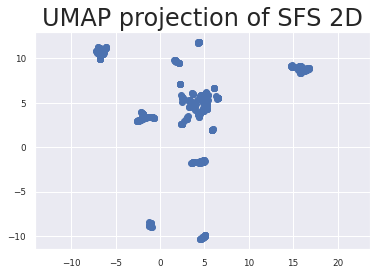

In [15]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
    #c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of SFS 2D', fontsize=24)

In [16]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=8, init='k-means++', n_init=10, 
                       max_iter=300, tol=0.0001, verbose=0, 
                       copy_x=True, algorithm='auto', random_state=12345).fit_predict(embedding)

In [17]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=(8,8)

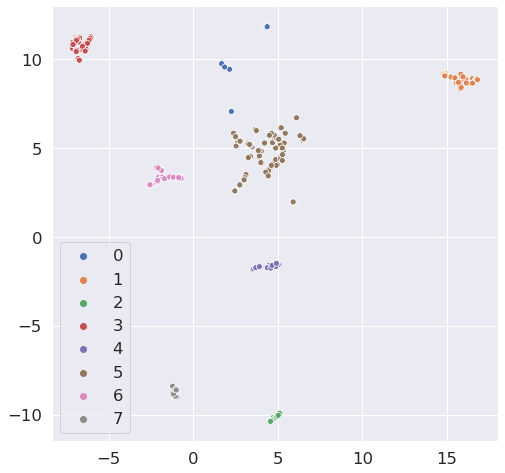

In [18]:
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], 
                hue=pd.Categorical(clusters))

In [19]:
import plotly.express as px
df = pd.DataFrame(embedding[:,0:2], index=SFS_df.index, columns=['X','Y'])
df['clusters'] = pd.Categorical(clusters)
df['name'] = df.index
fig = px.scatter(df, x="X", y="Y", color="clusters",
                 #size=10,'clusters', 
                 hover_data=['name'])
fig.update_traces(marker=dict(size=16,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [22]:
fst = pd.read_csv('../../results_5e6/fst_matrix/Fst_5e6.csv', sep='\t', index_col=0)

In [23]:
fst_values = pd.Series(index=df.index, dtype='float16')
IDX = np.array(df.index)
for i in IDX:
    name_1 = i.split('.')[0]
    name_2 = i.split('.')[1]
    fst_values[i] = fst.loc[name_1,name_2]

In [24]:
df['Fst'] = np.array(fst_values)

In [25]:
df=df.sort_values('clusters',ascending=True)

In [26]:
import plotly.express as px
fig = px.scatter(df, x="X", y="Y", color="clusters",
                 size='Fst', 
                 hover_data=['name','Fst'], 
                 color_discrete_sequence=px.colors.qualitative.D3)
fig.update_traces(marker=dict(line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

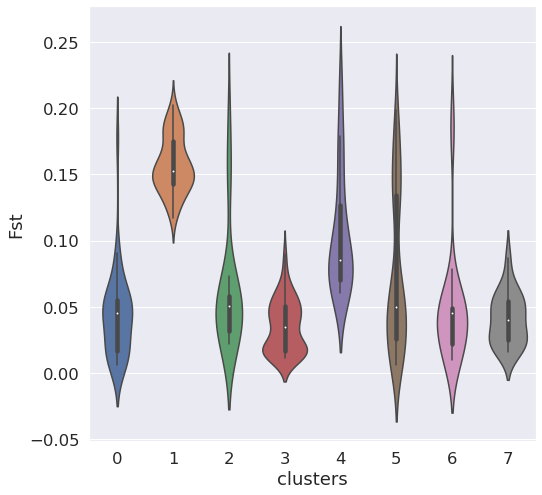

In [137]:
sns.violinplot(x='clusters', y='Fst', data=df)

In [45]:
fst

ATR       BUR       CON       COR       LAG   RB_2000   RB_2006  \
ATR      0.000000  0.137466  0.098685  0.107800  0.106844  0.145852  0.140961   
BUR      0.137466  0.000000  0.070341  0.111759  0.178972  0.177971  0.169539   
CON      0.098685  0.070341  0.000000  0.074695  0.132354  0.133980  0.129435   
COR      0.107800  0.111759  0.074695  0.000000  0.137694  0.136759  0.131876   
LAG      0.106844  0.178972  0.132354  0.137694  0.000000  0.178985  0.176485   
RB_2000  0.145852  0.177971  0.133980  0.136759  0.178985  0.000000  0.012623   
RB_2006  0.140961  0.169539  0.129435  0.131876  0.176485  0.012623  0.000000   
RB_2016  0.134576  0.159653  0.119992  0.120627  0.161524  0.013675  0.009839   
SK_1913  0.145825  0.182622  0.140900  0.140268  0.183527  0.051420  0.045986   
SK_1932  0.153218  0.188634  0.148391  0.148067  0.188869  0.045281  0.040724   
SK_1938  0.148241  0.183224  0.144148  0.142542  0.177882  0.044833  0.041723   
SK_1945  0.152197  0.194375  0.152529  0.154712  0.188922  0.053173  0.048302   
SK_1955  0.146790  0.180050  0.140904  0.140953  0.180501  0.040630  0.036055   
SK_1992  0.130376  0.163888  0.119394  0.121213  0.165877  0.018433  0.019428   
SK_1999  0.156420  0.187066  0.144756  0.146893  0.192795  0.013562  0.014215   
SK_2008  0.146671  0.175667  0.133826  0.137788  0.174461  0.009462  0.009936   
SK_2015  0.138348  0.166093  0.125717  0.130117  0.167298  0.012133  0.012794   
SN_1913  0.165993  0.202613  0.162508  0.161075  0.200468  0.081497  0.078988   
ST_1913  0.152875  0.192611  0.150480  0.146610  0.186798  0.054738  0.050085   
ST_1936  0.154863  0.198307  0.152885  0.152016  0.192878  0.054265  0.049298   
ST_1945  0.154922  0.191522  0.149047  0.147358  0.193715  0.049794  0.045962   
ST_1955  0.163219  0.198635  0.157222  0.155176  0.194529  0.049139  0.047565   
ST_2000  0.148205  0.180654  0.138413  0.142265  0.177500  0.014657  0.013580   
ST_2005  0.158587  0.186333  0.145605  0.150826  0.185407  0.021232  0.018044   
ST_2010  0.129449  0.162412  0.117805  0.122252  0.156833  0.013799  0.013967   
VA_1913  0.148536  0.185532  0.141243  0.142739  0.179950  0.059255  0.056694   
VA_1945  0.177024  0.215081  0.168564  0.167562  0.217572  0.085095  0.081827   
VA_2000  0.128627  0.163112  0.117239  0.119965  0.162318  0.013176  0.012657   
VA_2006  0.151541  0.179799  0.139249  0.135668  0.185533  0.015326  0.013482   
VA_2016  0.139061  0.165915  0.126658  0.126614  0.164952  0.011299  0.010266   

          RB_2016   SK_1913   SK_1932  ...   ST_1945   ST_1955   ST_2000  \
ATR      0.134576  0.145825  0.153218  ...  0.154922  0.163219  0.148205   
BUR      0.159653  0.182622  0.188634  ...  0.191522  0.198635  0.180654   
CON      0.119992  0.140900  0.148391  ...  0.149047  0.157222  0.138413   
COR      0.120627  0.140268  0.148067  ...  0.147358  0.155176  0.142265   
LAG      0.161524  0.183527  0.188869  ...  0.193715  0.194529  0.177500   
RB_2000  0.013675  0.051420  0.045281  ...  0.049794  0.049139  0.014657   
RB_2006  0.009839  0.045986  0.040724  ...  0.045962  0.047565  0.013580   
RB_2016  0.000000  0.045565  0.041556  ...  0.046617  0.047262  0.013326   
SK_1913  0.045565  0.000000  0.019782  ...  0.027656  0.033509  0.051635   
SK_1932  0.041556  0.019782  0.000000  ...  0.021168  0.024707  0.042915   
SK_1938  0.041438  0.017660  0.012806  ...  0.020599  0.024271  0.045358   
SK_1945  0.050808  0.026156  0.016972  ...  0.026365  0.030571  0.048614   
SK_1955  0.036858  0.024790  0.015061  ...  0.022094  0.021538  0.038045   
SK_1992  0.017583  0.043866  0.037592  ...  0.042296  0.044470  0.015878   
SK_1999  0.018940  0.052060  0.044418  ...  0.048262  0.050082  0.019055   
SK_2008  0.009078  0.048559  0.042188  ...  0.046629  0.046874  0.009202   
SK_2015  0.008385  0.047193  0.039380  ...  0.045153  0.046566  0.009022   
SN_1913  0.075791  0.056881  0.058107  ...  0.067714  0.065063  0.082402   
ST_1913  0.049762  0.019116  0.019501  ...  0.026777  0.03

In [21]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=6, init='k-means++', n_init=10, 
                       max_iter=300, tol=0.0001, verbose=0, 
                       copy_x=True, algorithm='auto').fit_predict(SFS_df)

In [41]:
SFS_df.loc[clusters==0,:]

0         1         2         3         4    \
SK_1938.CON.2dsfs.sfs  47.420326  4.435830  4.515098  4.467640  2.483637   
SK_1932.ATR.2dsfs.sfs  48.622259  3.596972  3.402256  2.350015  2.902198   
VA_2000.BUR.2dsfs.sfs  50.193184  5.109976  2.699375 -0.157538  3.867876   
SN_1913.COR.2dsfs.sfs  38.042163  4.436970  4.798740  6.126940  2.324654   
SK_1932.BUR.2dsfs.sfs  45.938554  4.040245  5.879100  1.762914  5.787729   
VA_2000.ATR.2dsfs.sfs  50.623074  2.163988  5.607737 -0.156313  4.415585   
ST_2000.BUR.2dsfs.sfs  54.451428  6.265607  4.904287 -0.138146  5.516564   
SK_1938.ATR.2dsfs.sfs  48.683638  2.692057  4.537260  1.159743  5.325621   
SK_1932.CON.2dsfs.sfs  47.052384  3.591325  5.089347  4.752015  3.586589   
VA_2000.CON.2dsfs.sfs  50.219245  1.690801  5.009236  4.921889  4.522715   
ST_2000.ATR.2dsfs.sfs  56.239466  2.813350  4.395691  3.241785  2.661036   
SK_1938.BUR.2dsfs.sfs  46.912160  4.740113  3.613927  1.158200  4.625083   
COR.BUR.2dsfs.sfs      57.386685  3.951626  4.973138  1.421802  1.555484   
SK_1999.BUR.2dsfs.sfs  42.515443  3.874801  5.099615  1.546308  5.240001   
SK_1955.COR.2dsfs.sfs  45.071836  4.047556  2.150377  4.873294  2.643588   
CON.BUR.2dsfs.sfs      56.814093  3.811903  4.421174  1.137359  0.491451   
VA_1913.COR.2dsfs.sfs  50.399408  5.794794  5.933825  7.641106  5.074237   
CON.ATR.2dsfs.sfs      57.344233  2.307105  3.768518  2.466553  1.990889   
SK_1945.CON.2dsfs.sfs  37.926768  3.191169  5.520594  3.557307  5.347675   
COR.ATR.2dsfs.sfs      57.583170  1.644883  2.784063  3.316968  1.445333   
SK_1999.ATR.2dsfs.sfs  44.310174  3.223685  3.955549  3.466862  4.116243   
ST_1945.ATR.2dsfs.sfs  40.041673  2.867398  6.122419  2.081458  2.984105   
SK_1945.BUR.2dsfs.sfs  37.424512  3.877975  4.664257  0.625385  6.049469   
SK_1999.CON.2dsfs.sfs  42.440143  3.635563  3.589255  6.632334  4.162092   
ST_1945.BUR.2dsfs.sfs  40.253418  4.573943  6.013900  1.398518  4.169511   
SK_1945.ATR.2dsfs.sfs  37.717763  2.841671  2.717747  4.195474  2.878206   
VA_2006.ATR.2dsfs.sfs  49.229171  2.046218  4.580717  3.217097  4.561189   
VA_1913.BUR.2dsfs.sfs  51.046687  4.877275  6.664601  1.405084  7.141935   
SK_1992.ATR.2dsfs.sfs  48.460869  1.315822  1.768440  1.347139  3.668677   
SK_1955.BUR.2dsfs.sfs  43.447606  4.276138  4.926424 -0.044918  5.968749   
SK_1913.CON.2dsfs.sfs  37.028432  3.779374  4.625642  3.443521  3.607797   
VA_2006.BUR.2dsfs.sfs  47.779872  4.042946  5.703370  2.099415  3.399920   
VA_1913.ATR.2dsfs.sfs  53.804102  2.550965  3.419095  3.121082  3.427960   
SK_1992.BUR.2dsfs.sfs  46.220166  4.377195  1.960713 -0.174826  4.043751   
SK_1955.ATR.2dsfs.sfs  45.144073  3.338446  3.342716  2.241268  4.385192   
ST_1913.BUR.2dsfs.sfs  43.632370  4.143177  5.621412  1.390228  4.665089   
SK_1913.ATR.2dsfs.sfs  37.279591  1.958752  4.185858  2.011523  3.400942   
ST_1913.ATR.2dsfs.sfs  45.241470  4.212271  4.752173  1.505603  4.363900   
SK_1913.BUR.2dsfs.sfs  36.291092  3.640167  4.282443  0.879273  4.110914   
SK_1955.CON.2dsfs.sfs  44.205555  1.675134  4.456278  4.825351  4.919430   
VA_1913.CON.2dsfs.sfs  50.580897  4.344806  7.985128  4.941298  5.171881   
SN_1913.ATR.2dsfs.sfs  38.312665  3.405577  6.128435  1.919577  3.135141   
RB_2000.CON.2dsfs.sfs  46.985142  4.419599  2.745837  5.891113  5.181217   
SN_1913.BUR.2dsfs.sfs  38.557904  4.554188  4.808297  2.184927  5.348073   
SN_1913.CON.2dsfs.sfs  37.912671  3.666951  4.315964  4.810224  4.742493   
RB_2000.ATR.2dsfs.sfs  46.810493  1.644851  6.374246  1.940700  3.851033   
RB_2000.BUR.2dsfs.sfs  46.466847  6.302543  3.539096  1.665172  3.835487   

                            5         6         7         8         9    ...  \
SK_1938.CON.2dsfs.sfs  3.630663  0.927297  3.380028  0.619272  3.529178  ...   
SK_1932.ATR.2dsfs.sfs  3.586255  0.689047  5.238138 -0.159227  2.678111  ...   
VA_2000.BUR.2dsfs.sfs  0.026808  1.375509 -0.157538  1.724696 -0.157538  ...   
SN_1913.COR.2dsfs.sfs  4.507030  2.588207  2.435295  1.36518

In [46]:
mapper = umap.UMAP().fit(SFS_df)

In [60]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=3, init='k-means++', n_init=10, 
                       max_iter=300, tol=0.0001, verbose=0, 
                       copy_x=True, algorithm='auto').fit_predict(corr_5e5)

In [84]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from matplotlib import colors


corr_array = np.asarray(corr_5e5)
row_linkage = hierarchy.linkage(
    distance.pdist(corr_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(corr_array.T), method='average')

x = sns.clustermap(corr_5e5.astype('float16'), row_linkage=row_linkage, col_linkage=col_linkage, method="average",
               col_colors=cmap, row_colors=cmap, figsize=(13, 13))

ValueError: Invalid RGBA argument: 98

<Figure size 936x936 with 0 Axes>

/home/samuele/miniconda3/envs/salmon/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


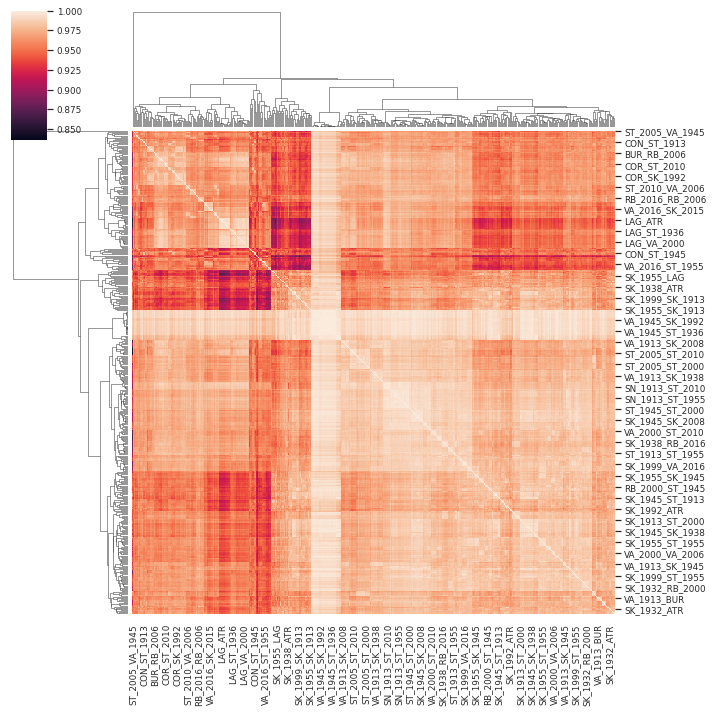

In [40]:
sns.clustermap( corr_5e5.astype('float16') )